<div style="text-align: center;">
    <h1>End-to-end ML Project</h1>
    <h1>Housing Price Prediction with Linear Regression</h1>
    <h1>Francisco Uriel Olivas Márquez 341948</h1>
</div>

![Presentación sin título (3).png](attachment:ec5dd0cd-c655-49a6-8c25-852d132d73af.png)

### Machine Learning
### Fecha: 5 de septiembre del 2024

Se realizará un proyecto en el que se crearán y analizaran modelos de aprendizaje automático que
permitan obtener una predicción del precio de una casa de California basándose en diversos datos de entrada.

Para esto se utilizará el conjunto de datos de precios de la vivienda en California del repositorio StatLib que se basa en datos del censo de California de 1990.




In [1]:
%pip install plotly

In [2]:
%pip install pandas

In [3]:
%pip install nbformat

# Get data (Conjunto de datos)
El primer paso del proyecto implica cargar el dataset a utilizar. Además se importan las librerías que se usarán.

In [4]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("housing.csv")
data.head()

,serial,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


# Discover and visualize the data
En este paso del proyecto se realiza la exploración de la base de datos. Para esto se utilizan diversas funciones que permiten obtener una mejor idea de la manera en que está estructurado el dataset. Se debe hacer énfasis en encontrar datos nulos, saber si hay datos categóricos que deben ser transformados, etc.

En este caso se encontraron 207 datos nulos en la categoría de "total_bedrooms".
Además se observó que los datos de la columna "ocean_proximity" son categóricos.

In [7]:
## EXPLORACIÓN DE LA BASE DE DATOS ##
data = pd.read_csv('housing.csv')
print(data.head())
print("_____________________________________________")
print(data.info())
print("_____________________________________________")
print(data.describe())

   serial  longitude  latitude  housing_median_age  total_rooms  \
0       0    -122.23     37.88                  41          880   
1       1    -122.22     37.86                  21         7099   
2       2    -122.24     37.85                  52         1467   
3       3    -122.25     37.85                  52         1274   
4       4    -122.25     37.85                  52         1627   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0         322         126         8.3252              452600   
1          1106.0        2401        1138         8.3014              358500   
2           190.0         496         177         7.2574              352100   
3           235.0         558         219         5.6431              341300   
4           280.0         565         259         3.8462              342200   

  ocean_proximity  
0        NEAR BAY  
1        NEAR BAY  
2        NEAR BAY  
3        NEAR BAY  
4        NEAR BA

The train set length is:  16512
The test set length is:  4128
_______________________________________
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64
_______________________________________


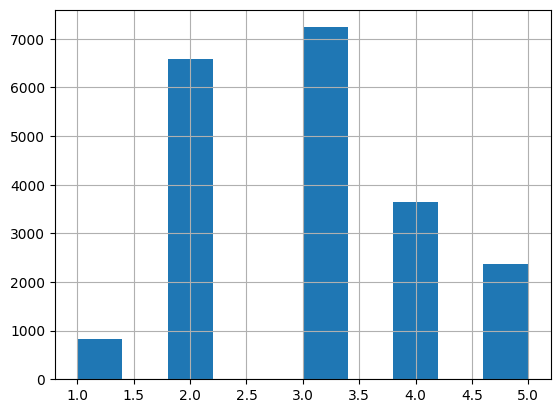

In [8]:
## SEPARACIÓN DE LOS DATOS ##
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42) #Test = 20%, Entrenamiento = 80%
print("The train set length is: ", len(train_set))
print("The test set length is: ", len(test_set))
print("_______________________________________")

data["income_cat"] = pd.cut(data["median_income"], #Pasar a bins
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])
data["income_cat"].hist()

from sklearn.model_selection import StratifiedShuffleSplit # Muestreo estratificado
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["income_cat"]):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
print("_______________________________________")

for set_ in (strat_train_set, strat_test_set): #Eliminar para volver al estado original
  set_.drop("income_cat", axis=1, inplace=True)

housing = strat_train_set.copy()

_______________________________________
Índice de Correlación
median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
serial                0.072086
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64
_______________________________________


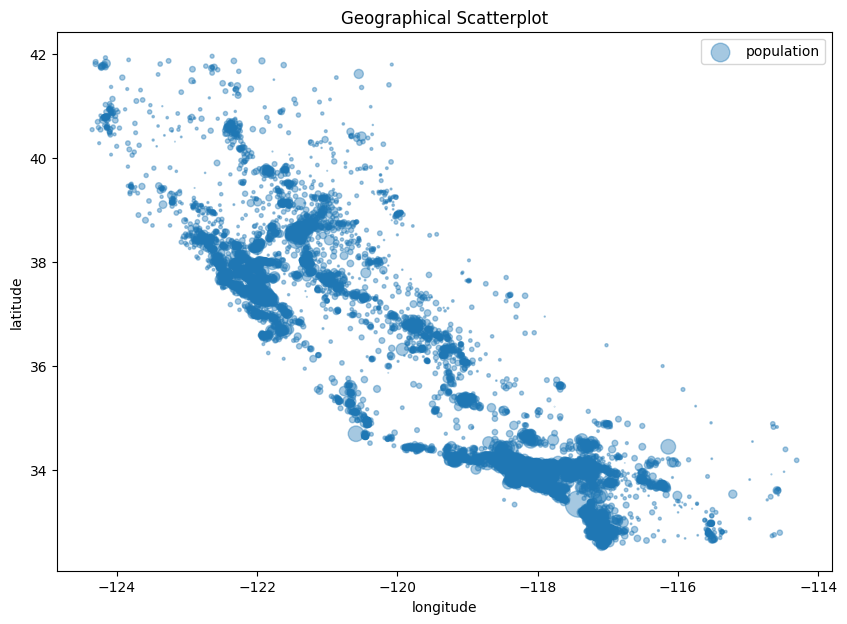

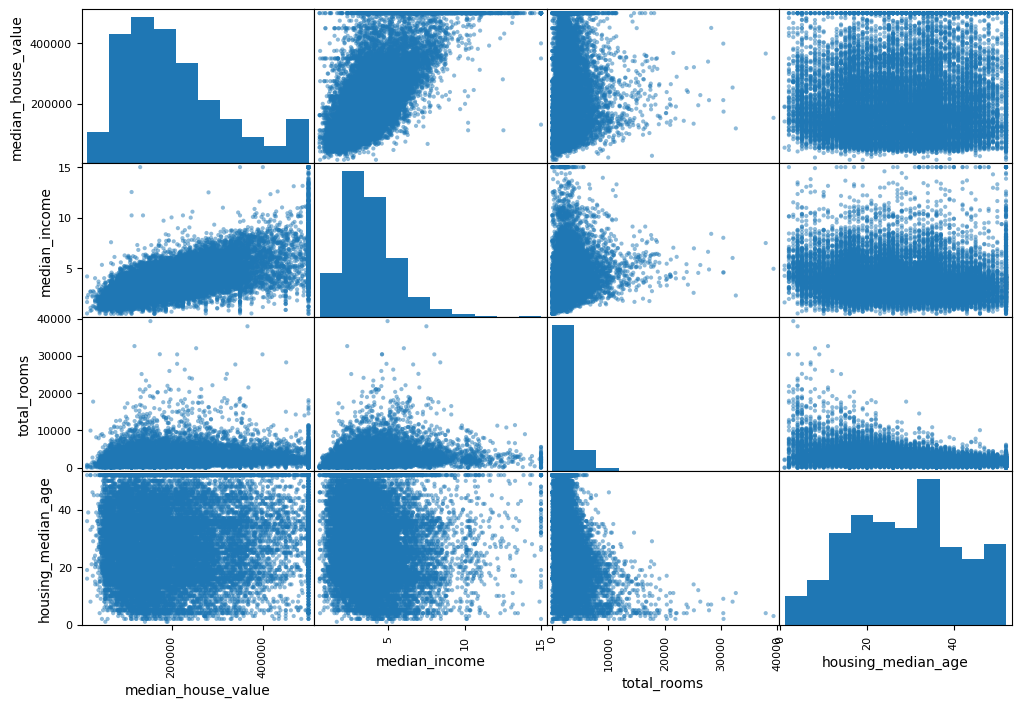

In [9]:
## VISUALIZACIÓN DE DATOS ##
housing.plot(kind="scatter", x='longitude', y='latitude', title='Geographical Scatterplot', alpha=0.4,s=housing["population"]/100, label="population", figsize=(10,7))
plt.legend()

# Gráfica de Barras
conteo_especie = data["ocean_proximity"].value_counts().reset_index()
fig = px.bar(conteo_especie, x="ocean_proximity", y='count', title='Conteo')
fig.show()

#Diagrama de Caja
fig2 = px.box(data, x='median_house_value', title='Diagrama de Caja')
fig2.show()

# e) Correlaciones
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[attributes], figsize=(12, 8))

housing_num = data.drop("ocean_proximity", axis=1)
corr_matrix = housing_num.corr()
print("_______________________________________")
print("Índice de Correlación")
print(corr_matrix["median_house_value"].sort_values(ascending=False))
print("_______________________________________")

# Prepare the data for ML algorithms
Algo muy importante de los algoritmos de Machine Learning es que requieren datos limpios para que los resultados sean mejores, por lo que estos se deben preparar utilizando métodos como el OneHotEncoder que permite crear atributos binarios para datos categóricos, o utilizar Custom Transformers para la obtención de nuevas features basándose en las ya existentes.

Otra cosa de suma importancia es el uso de Transformation Pipelines, las cuales permiten agregar las features creadas a la base de datos, además de estandarizar y escalar los datos, proporcionándole así datos de gran calidad al modelo.

In [10]:
## PREPARACIÓN DE LOS DATOS ##
housing = strat_train_set.drop("median_house_value", axis=1) #Separar las etiquetas
housing = housing.drop("serial", axis=1)
housing_labels = strat_train_set["median_house_value"].copy() #Regresar a un set de entrenamiento limpio

#Total bedrooms (Valores Nulos)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num) #Reemplaza valores nulos con las medias
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

#Valores categóricos
housing_cat = housing[["ocean_proximity"]]
print(housing_cat.head(10))
print("_______________________________________")

from sklearn.preprocessing import OneHotEncoder #Atributos binarios por categoría
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()
print(cat_encoder.categories_)
print("_______________________________________")
print(housing_cat_1hot)

      ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN
_______________________________________
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
_______________________________________
  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 3)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 3)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 4)	1.0
  (16490, 4)	1.0
  (16491, 1)	1.0
  (16492, 1)	1.0
  (16493, 0)	1.0
  (16494, 0)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 0)	1.0
  (16498, 4)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16

In [11]:
#Custom Transformers
#Añade nuevos atributos a partir de la combinación de otros ya existentes
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self # nothing else to do
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#Transformation Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#Escalar, estandarizar datos
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
#('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
print(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])

print(full_pipeline)
print("_______________________________________")

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared[0])

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                  29         3873           797.0   
15502    -117.23     33.09                   7         5320           855.0   
2908     -119.04     35.37                  44         1618           310.0   
14053    -117.13     32.75                  24         1877           519.0   
20496    -118.70     34.28                  27         3536           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                  14         6665          1231.0   
12661    -121.42     38.51                  15         7901          1422.0   
19263    -122.72     38.44                  48          707           166.0   
19140    -122.70     38.31                  14         3155           580.0   
19773    -122.14     39.97                  27         1079           222.0   

       population  households  median_income  
1265

# Select a model and train it.
Por ahora el modelo utilizado es la Regresión Lineal. Para utilizarla se importó de la librería "sklearn".

Posteriormente se agregarán otros modelos al proyecto.

In [12]:
## Entrenamiento de Modelos ##
# Regresión Lineal
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() #fit_intercept: Calculate intercept, the mean value of the response variable when all predictor variables are zero
                             #copy_x :If True, X will be copied; else, it may be overwritten.
                             #n_jobs: The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
                             #positive: When set to True, forces the coefficients to be positive.
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5] #iloc es para seleccionar filas o columnas de un dataframe
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

from sklearn.metrics import mean_squared_error #Medir el RMSE (Raíz del Error Cuadrático Medio)
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE de Regresión Lineal: ", lin_rmse)
print("_____________________________")

Predictions: [ 88983.14806384 305351.35385026 153334.71183453 184302.55162102
 246840.18988841]
Labels: [72100, 279600, 82700, 112500, 238300]
RMSE de Regresión Lineal:  69050.56219504567
_____________________________


#  Fine-tune your model.
Luego, se realiza el ajuste fino del modelo seleccionado. Para esto se utilizó GridSearch, al cual se le otorgó un param_grid con los hiperparámetros de la Regresión Lineal y los valores que pueden tomar. Después GridSearch busca cuáles de estos generan mejores resultados y conforme a ellos, se reentrena el modelo.

En este caso los parámetros obtenidos fueron 'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, ya que con ellos el RMSE (Raíz del Error Cuadrático Medio) fue menor que con cualquier otra combinación.

Además, el modelo entrenado se debe descargar en formato pkl y el pipeline en formato joblib para poder utilizarlos en el último paso del proyecto.

In [17]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [1, 5, 10, -1]
}
#Setup
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# Fit the model
grid_search.fit(housing_prepared, housing_labels)
# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

lin_reg = LinearRegression(copy_X=True, fit_intercept= True, positive= False)
lin_reg.fit(housing_prepared, housing_labels)
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5] #iloc es para seleccionar filas o columnas de un dataframe
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

from sklearn.metrics import mean_squared_error #Métricas del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE: ", lin_rmse)
mse = np.sqrt(lin_rmse)
print(f'MSE: {mse}')
r2 = r2_score(housing_labels, housing_predictions)
print(f'R²: {r2}')
mae = mean_absolute_error(housing_labels, housing_predictions)
print(f'MAE: {mae}')
print("_____________________________")

#Save model
import joblib
joblib.dump(lin_reg, "lin_reg.pkl")
lin_reg_loaded = joblib.load("lin_reg.pkl")

#Save pipeline
joblib.dump(full_pipeline, 'pipeline.joblib')
pipeline_loaded = joblib.load('pipeline.joblib')

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}
Best Score: -4791669824.226568
Predictions: [ 88983.14806384 305351.35385026 153334.71183453 184302.55162102
 246840.18988841]
Labels: [72100, 279600, 82700, 112500, 238300]
RMSE:  69050.56219504567
MSE: 262.7747365997075
R²: 0.6438078994746375
MAE: 49905.329442715316
_____________________________


# Present the solution
Por último, se utilizó Streamlit para generar una aplicación web que permita realizar la predicción del precio de las casas a partir de los datos ingresados. A continuación se muestra el código utilizado para generar la aplicación, además del enlace para acceder a esta.

In [ ]:
## STREAMLIT CODE ##
# https://housing-lr.streamlit.app/
'''import streamlit as st
import numpy as np
import pandas as pd
import joblib
from sklearn.linear_model import LinearRegression

model = joblib.load('lin_reg13.pkl')
full_pipeline = joblib.load('pipeline.joblib')

def predict_price(features):
    features_df = pd.DataFrame([features], columns=[
        'longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity',
    ])

    # Transformar las features usando el pipeline
    transformed_features = full_pipeline.transform(features_df)
    prediction = model.predict(transformed_features)
    return prediction[0]

st.title("Housing Price Prediction")
st.write("### Input Data")
col1, col2 = st.columns(2)
# Inputs
longitude = col1.number_input("Longitude", min_value=-180.0, max_value=180.0, value=0.0)
latitude = col1.number_input("Latitude", min_value=0.0, max_value=90.0, value=0.0)
housing_median_age = col2.number_input("Housing Median Age", min_value=0.0, max_value=100.0, value=0.0)
total_rooms = col2.number_input("Total Rooms", min_value=0.0, value=0.0)
total_bedrooms = col1.number_input("Total Bedrooms", min_value=0.0, value=0.0)
population = col1.number_input("Population", min_value=0.0, value=0.0)
households = col2.number_input("Households", min_value=0.0, value=0.0)
median_income = col2.number_input("Median Income", min_value=0.0, value=0.0)
ocean_proximity = st.selectbox(
    "Ocean Proximity",
    ["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]
)

features = [
    longitude,
    latitude,
    housing_median_age,
    total_rooms,
    total_bedrooms,
    population,
    households,
    median_income,
    ocean_proximity
]

st.write("### Output Data")
if st.button("Predict"):
    prediction = predict_price(features)
    st.write(f"El precio estimado de la casa es: ${prediction:,.2f}")'''